In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/najwhoas/stress-analysis/main/StressLevelDataset.csv')

data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,2.181818,0.833575,1.0,1.0,2.0,3.0,3.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


In [ ]:
data['blood_pressure'] = data['blood_pressure'].map({1:0,2:1,3:2})

In [ ]:
data.describe(include="all").transpose()

,count,mean,std,min,25%,50%,75%,max
anxiety_level,1100.0,11.063636,6.117558,0.0,6.0,11.0,16.0,21.0
self_esteem,1100.0,17.777273,8.944599,0.0,11.0,19.0,26.0,30.0
mental_health_history,1100.0,0.492727,0.500175,0.0,0.0,0.0,1.0,1.0
depression,1100.0,12.555455,7.727008,0.0,6.0,12.0,19.0,27.0
headache,1100.0,2.508182,1.409356,0.0,1.0,3.0,3.0,5.0
blood_pressure,1100.0,1.181818,0.833575,0.0,0.0,1.0,2.0,2.0
sleep_quality,1100.0,2.660000,1.548383,0.0,1.0,2.5,4.0,5.0
breathing_problem,1100.0,2.753636,1.400713,0.0,2.0,3.0,4.0,5.0
noise_level,1100.0,2.649091,1.328127,0.0,2.0,3.0,3.0,5.0
living_conditions,1100.0,2.518182,1.119208,0.0,2.0,2.0,3.0,5.0


## Clean outliers

In [ ]:
for var in data.columns:
  Q1 = data[var].quantile(0.25)
  Q3 = data[var].quantile(0.75)
  IQR = Q3 - Q1
  maximum = Q3 + (1.5 * IQR)
  minimum = Q1 - (1.5 * IQR)
  kondisi_lower_than = data[var] < minimum
  kondisi_more_than = data[var] > maximum
  data[var] = data[var].mask(cond=kondisi_more_than, other=maximum)
  data[var] = data[var].mask(cond=kondisi_lower_than, other=minimum)

In [ ]:
data = data.astype('int64')

## Visualisasi

### Bagaimana proporsi setiap level stress siswa pada data?

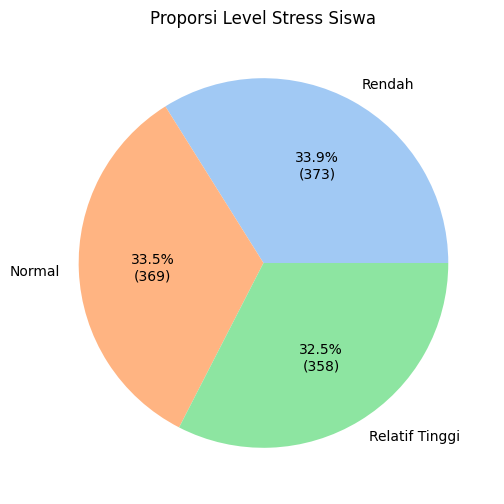

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

total = data['stress_level'].value_counts().values.sum()

label = ['Rendah', 'Normal', 'Relatif Tinggi']

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 6))
plt.pie(data['stress_level'].value_counts().values, labels=label, autopct=lambda x: '{:.1f}%\n({:.0f})'.format(x, total*x/100), colors=colors)
plt.title('Proporsi Level Stress Siswa')
plt.show()


bbb

<ipython-input-8-b29020efd8b1>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='mental_health_history', y='stress_level', cmap='viridis', shade=True)


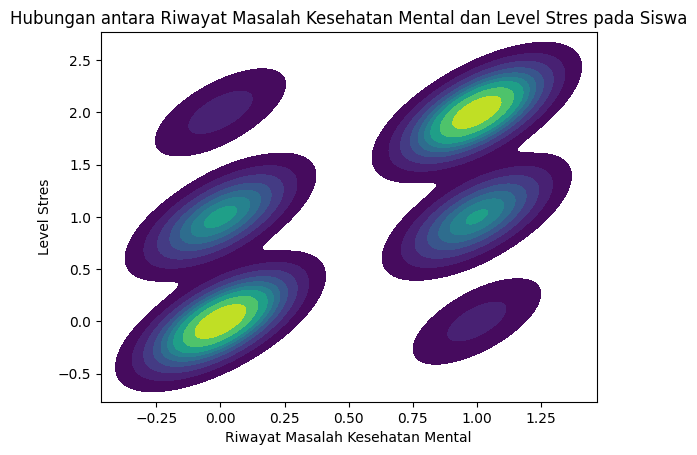

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gunakan data Anda
sns.kdeplot(data=data, x='mental_health_history', y='stress_level', cmap='viridis', shade=True)
plt.title('Hubungan antara Riwayat Masalah Kesehatan Mental dan Level Stres pada Siswa')
plt.xlabel('Riwayat Masalah Kesehatan Mental')
plt.ylabel('Level Stres')
plt.show()


In [ ]:
corr = np.corrcoef(data['blood_pressure'], data['stress_level'])

print("Correlation coefficient: \n", corr)

Correlation coefficient: 
 [[1.         0.39419986]
 [0.39419986 1.        ]]


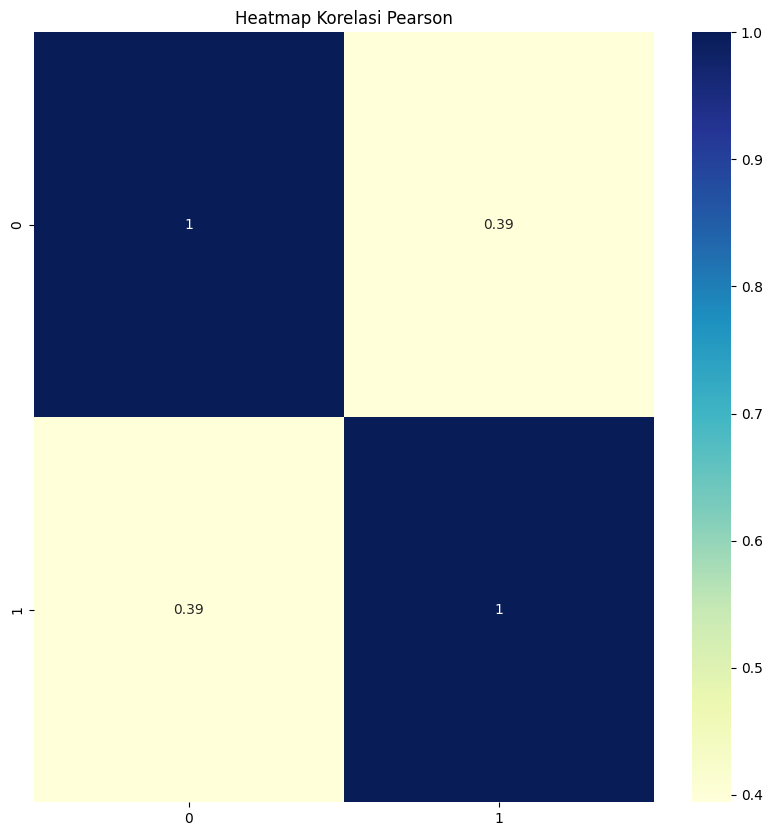

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title('Heatmap Korelasi Pearson')
plt.show()

### Bagaimana distribusi dari masing-masing faktor stressor berdasarkan level stress?

Factor Psikologis

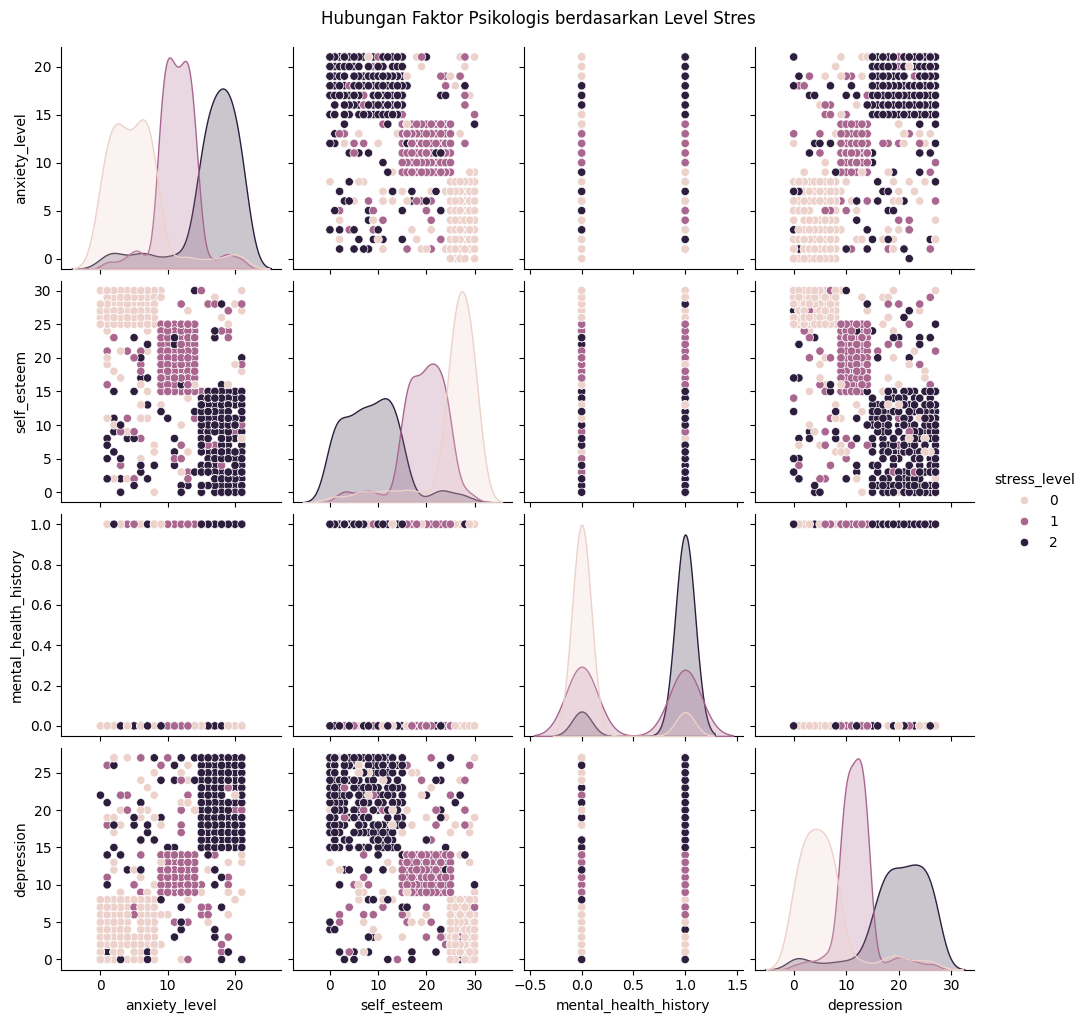

In [ ]:
psychologist = data[['anxiety_level','self_esteem','mental_health_history','depression','stress_level']]
pairplot = sns.pairplot(psychologist, hue="stress_level")
pairplot.fig.suptitle("Hubungan Faktor Psikologis berdasarkan Level Stres", y=1.02)
plt.show()

Faktor Fisiologis

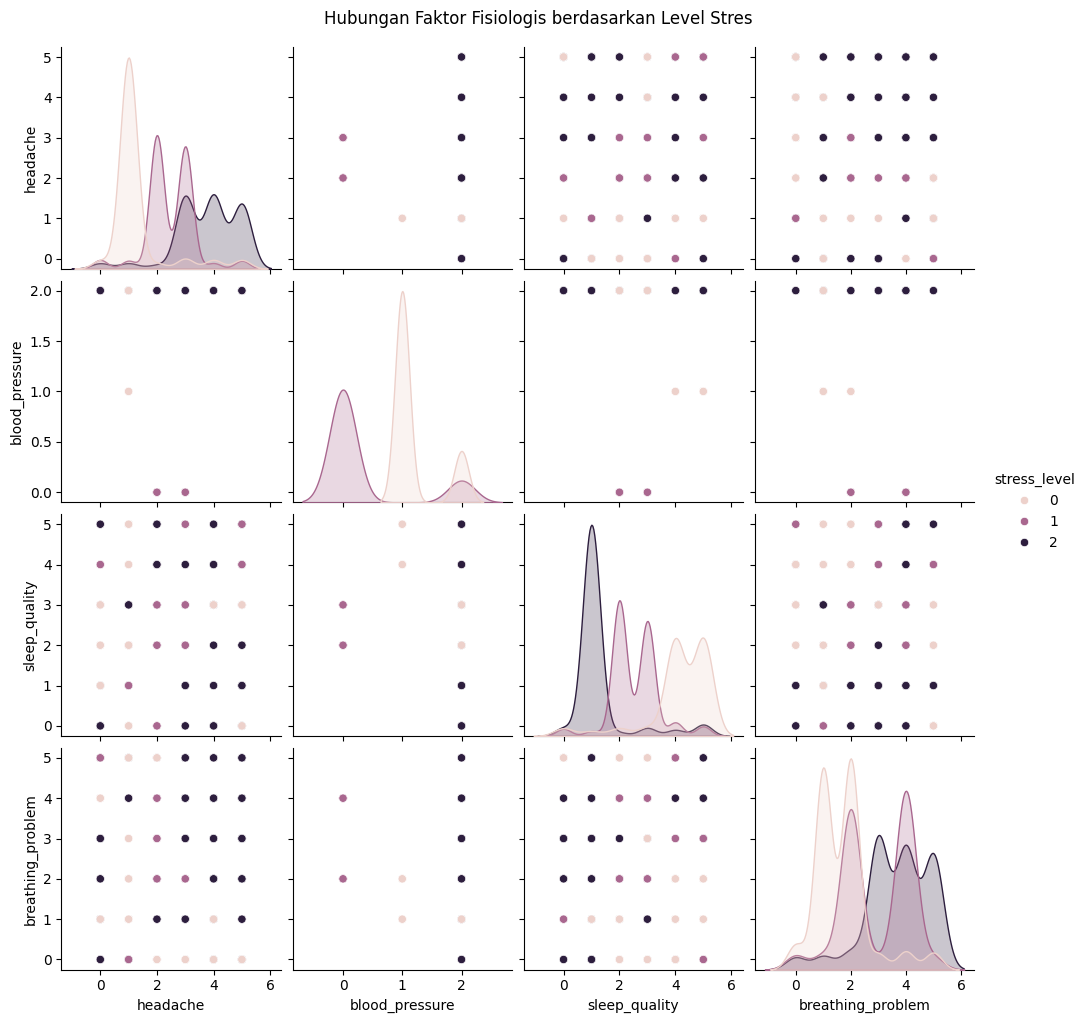

In [ ]:
fisio = data[['headache','blood_pressure','sleep_quality','breathing_problem','stress_level']]
pairplot = sns.pairplot(fisio, hue="stress_level")
pairplot.fig.suptitle("Hubungan Faktor Fisiologis berdasarkan Level Stres", y=1.02)
plt.show()

Faktor Sosial

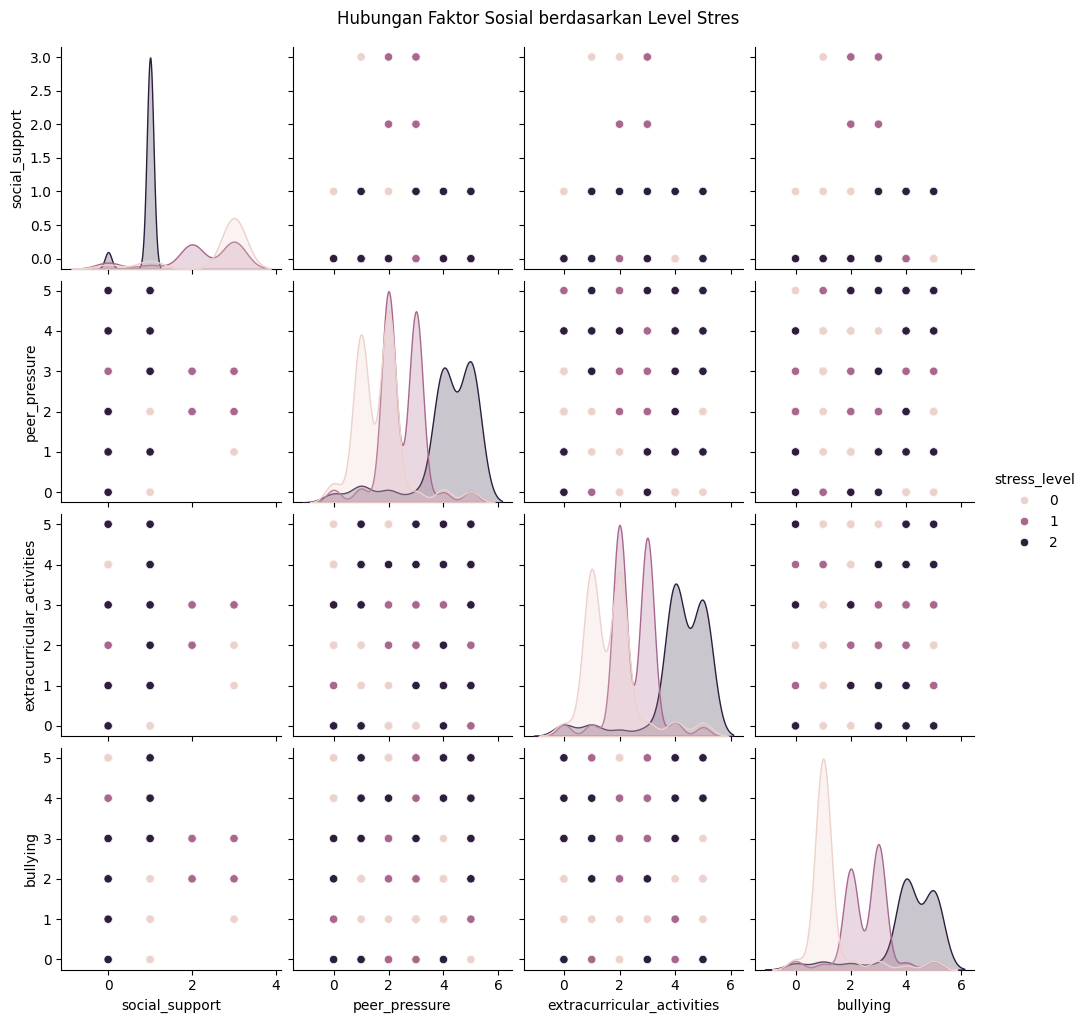

In [ ]:
social = data[['social_support','peer_pressure','extracurricular_activities','bullying','stress_level']]
pairplot = sns.pairplot(social, hue="stress_level")
pairplot.fig.suptitle("Hubungan Faktor Sosial berdasarkan Level Stres", y=1.02)
plt.show()

Faktor Academic

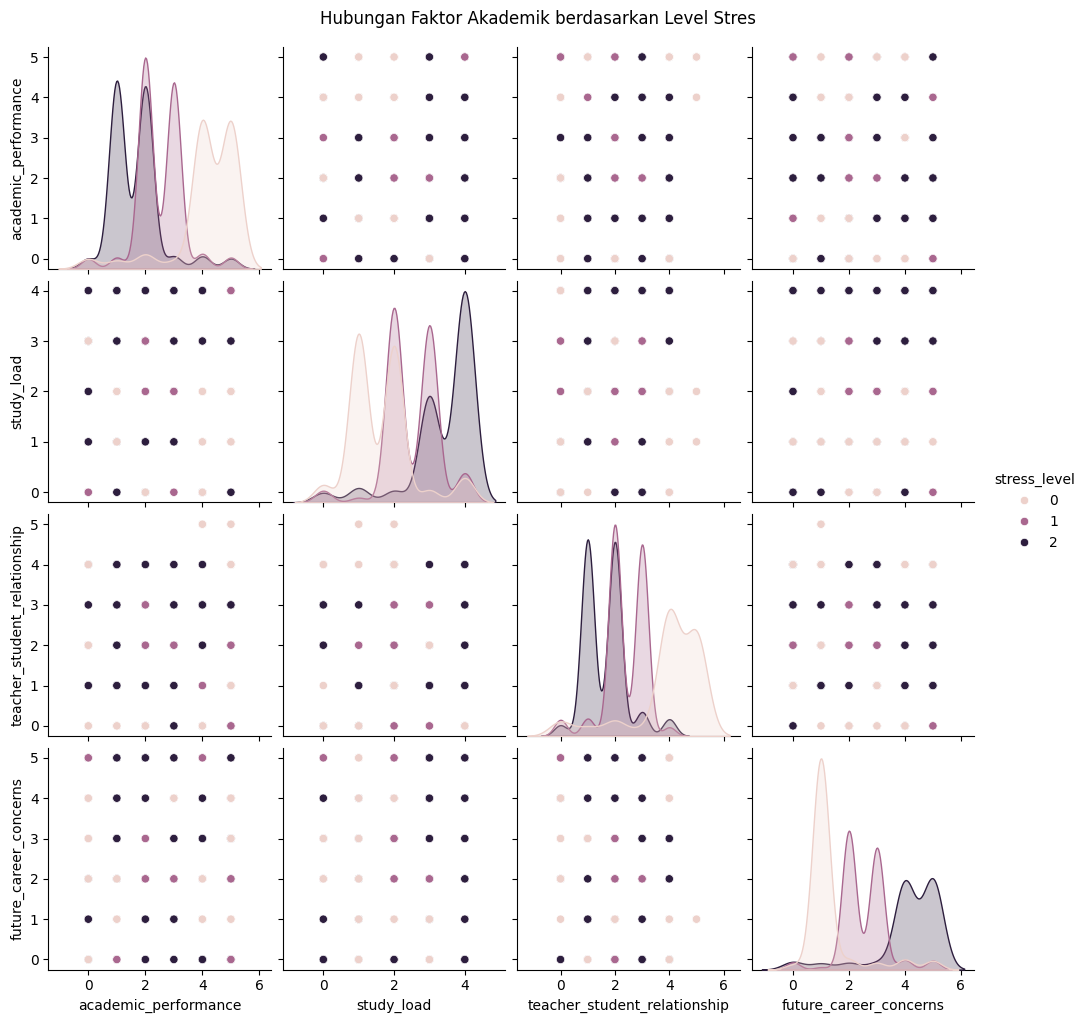

In [ ]:
academic = data[['academic_performance','study_load','teacher_student_relationship','future_career_concerns','stress_level']]
pairplot = sns.pairplot(academic, hue="stress_level")
pairplot.fig.suptitle("Hubungan Faktor Akademik berdasarkan Level Stres", y=1.02)
plt.show()

Faktor Lingkungan

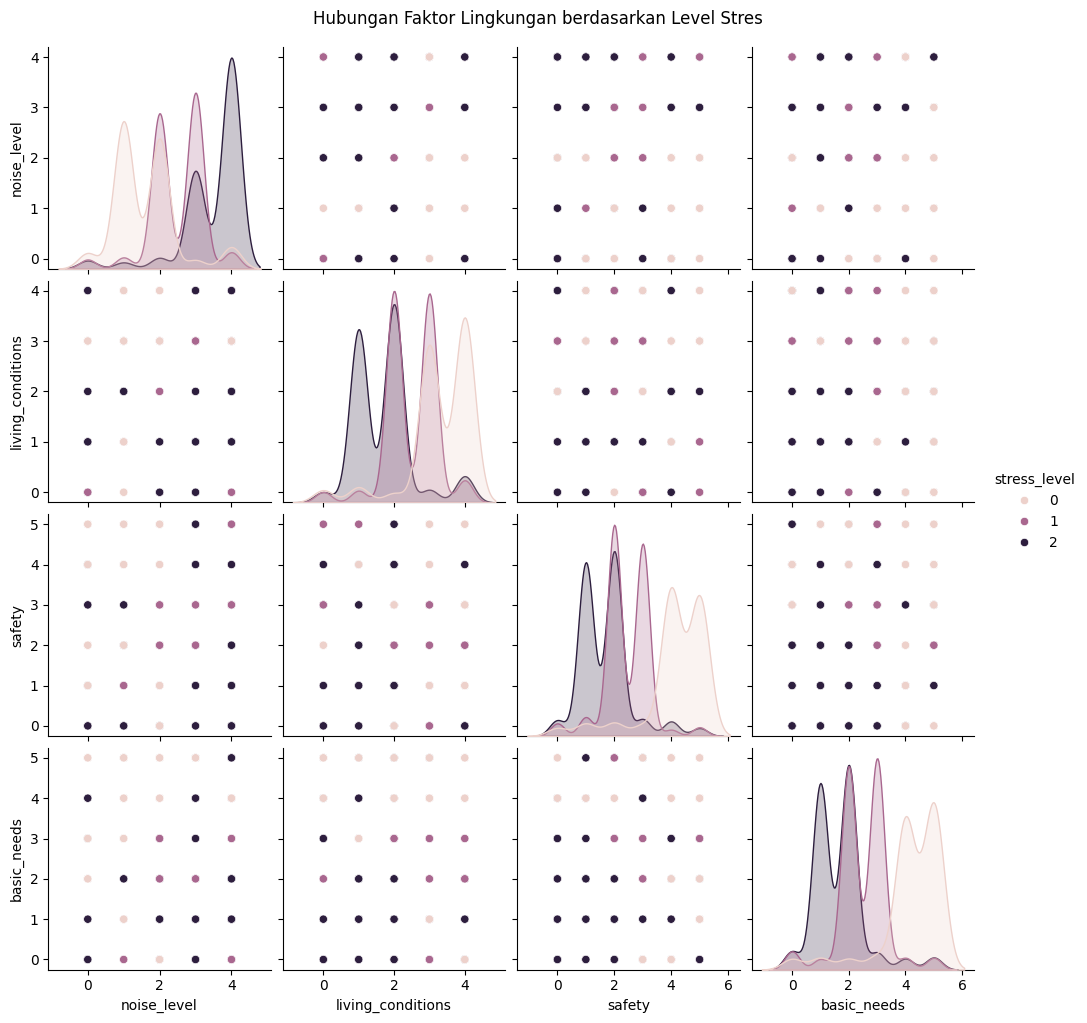

In [ ]:
envi = data[['noise_level','living_conditions','safety','basic_needs','stress_level']]
pairplot = sns.pairplot(envi, hue="stress_level")
pairplot.fig.suptitle("Hubungan Faktor Lingkungan berdasarkan Level Stres", y=1.02)
plt.show()

In [ ]:
data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('YlGnBu'), axis=1)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
anxiety_level,1.0,-0.6727,0.6344,0.6943,0.6327,0.3309,-0.7103,0.5617,0.6177,-0.5937,-0.6512,-0.6371,-0.6496,0.604,-0.6632,0.717,-0.5697,0.6429,0.641,0.71,0.7368
self_esteem,-0.6727,1.0,-0.6035,-0.6996,-0.6261,-0.5147,0.6627,-0.5105,-0.5709,0.5803,0.644,0.6312,0.639,-0.5765,0.6529,-0.7125,0.6792,-0.6071,-0.6412,-0.6407,-0.7562
mental_health_history,0.6344,-0.6035,1.0,0.6159,0.6048,0.2956,-0.6141,0.4643,0.5239,-0.5224,-0.5467,-0.6012,-0.5862,0.5435,-0.5877,0.6259,-0.4826,0.5806,0.5546,0.6244,0.6486
depression,0.6943,-0.6996,0.6159,1.0,0.6577,0.4361,-0.6932,0.5225,0.5704,-0.5617,-0.6259,-0.6088,-0.6332,0.607,-0.6739,0.7066,-0.618,0.6355,0.6486,0.6658,0.7344
headache,0.6327,-0.6261,0.6048,0.6577,1.0,0.362,-0.6388,0.4617,0.544,-0.5677,-0.5891,-0.6232,-0.6221,0.5543,-0.6259,0.6793,-0.573,0.6226,0.5826,0.6098,0.7135
blood_pressure,0.3309,-0.5147,0.2956,0.4361,0.362,1.0,-0.3003,0.1623,0.3051,-0.3166,-0.2884,-0.2806,-0.2628,0.3048,-0.3521,0.4341,-0.7525,0.4014,0.4263,0.3704,0.3942
sleep_quality,-0.7103,0.6627,-0.6141,-0.6932,-0.6388,-0.3003,1.0,-0.5417,-0.5936,0.5602,0.6577,0.621,0.6713,-0.577,0.6776,-0.6821,0.5546,-0.6491,-0.6231,-0.6994,-0.7491
breathing_problem,0.5617,-0.5105,0.4643,0.5225,0.4617,0.1623,-0.5417,1.0,0.4737,-0.4582,-0.5193,-0.5082,-0.5073,0.4403,-0.4989,0.5453,-0.3652,0.4927,0.5169,0.5763,0.574
noise_level,0.6177,-0.5709,0.5239,0.5704,0.544,0.3051,-0.5936,0.4737,1.0,-0.4798,-0.5444,-0.589,-0.5187,0.5107,-0.5469,0.5803,-0.4722,0.5899,0.5654,0.5993,0.6805
living_conditions,-0.5937,0.5803,-0.5224,-0.5617,-0.5677,-0.3166,0.5602,-0.4582,-0.4798,1.0,0.5904,0.5325,0.5391,-0.4726,0.5909,-0.5918,0.5267,-0.5293,-0.5464,-0.576,-0.615


## Splitting data

In [ ]:
X = data.drop('stress_level', axis=1)
y = data['stress_level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


## Tuning Hyperparameter

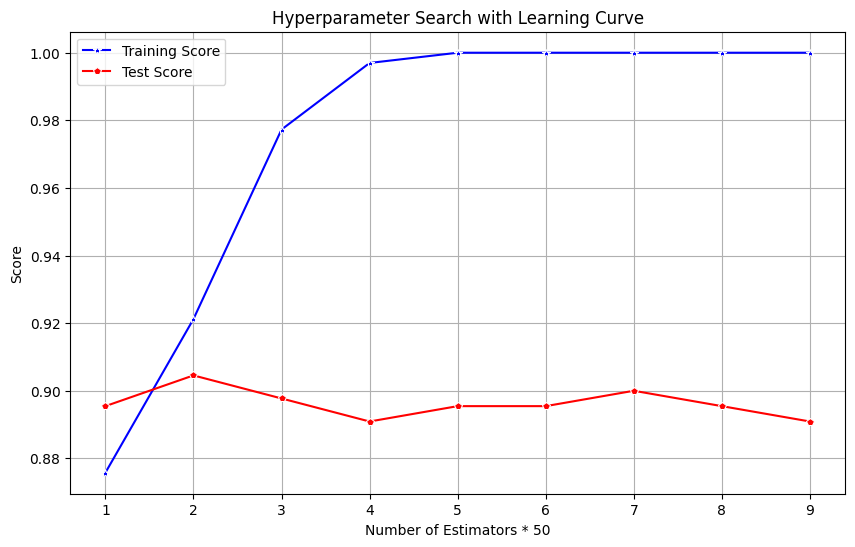

In [ ]:
train_scores = []
test_scores = []

for i in range(1, 10):
    rfc = RandomForestClassifier(n_estimators=i * 50, max_depth=i + 1, min_samples_split=i + 1, max_features=i / 20)
    rfc.fit(X_train, y_train)
    train_scores.append(rfc.score(X_train, y_train))
    test_scores.append(rfc.score(X_test, y_test))

plt.figure(figsize=(10, 6))
sns.lineplot(x=range(1, 10), y=train_scores, marker='*', color='b', label='Training Score')
sns.lineplot(x=range(1, 10), y=test_scores, marker='p', color='r', label='Test Score')

plt.title('Hyperparameter Search with Learning Curve')
plt.xlabel('Number of Estimators * 50')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


n_estimators=75, max_depth = 2, min_samples_split = 2, criterion='gini', max_features = 0.075, random_state=42

## Modelling

In [ ]:
randfor = RandomForestClassifier(n_estimators=75, max_depth = 2, min_samples_split = 2, criterion='gini', max_features = 0.075, random_state=42)
randfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features=0.075, n_estimators=75,
                       random_state=42)

In [ ]:
y_pred = randfor.predict(X_test)

Accuracy: 0.8931818181818182
Accuracy with Cross Validation:  0.8736363636363637


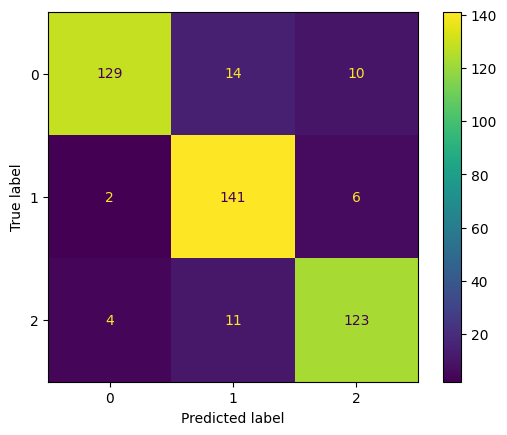

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cv_scores = cross_val_score(randfor, X, y, cv=10)
print("Accuracy with Cross Validation: ", cv_scores.mean())

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.8931818181818182
Precision: 0.8966150774159788
Recall: 0.8935834425200874
F1: 0.8930526903902356


## Evaluate

<Figure size 1000x600 with 0 Axes>

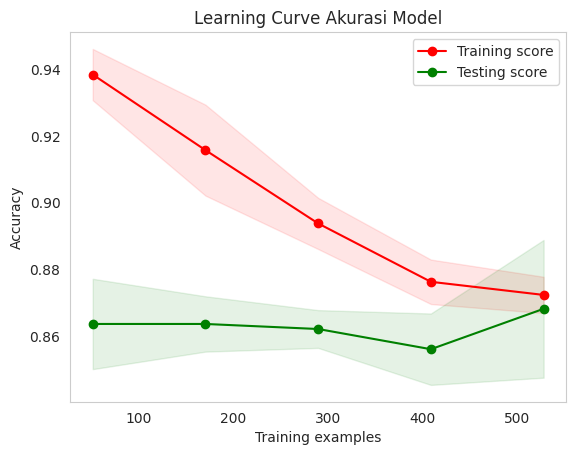

In [ ]:

from sklearn.model_selection import learning_curve
import numpy as np
def plot_training_testing_curve(estimator, X_train, y_train, X_test, y_test, title, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
    estimator, X_train, y_train, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Testing score")

    plt.legend(loc="best")
    return plt

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

plot_training_testing_curve(randfor, X_train, y_train, X_test, y_test, "Learning Curve Akurasi Model")
plt.show()


<ipython-input-25-d4320351cf95>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=f_importances.values, y=f_importances.index, palette='viridis')


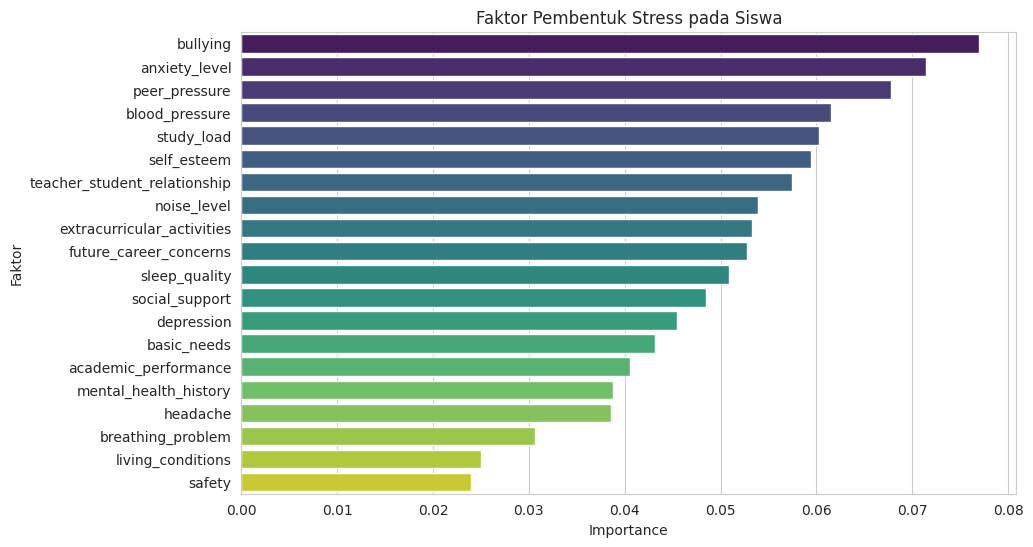

In [ ]:
f_importances = pd.Series(randfor.feature_importances_, index=X_test.columns)
f_importances.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=f_importances.values, y=f_importances.index, palette='viridis')
plt.xlabel("Importance")
plt.ylabel("Faktor")
plt.title("Faktor Pembentuk Stress pada Siswa")
plt.show()

In [ ]:
data.to_csv('cleaned_data.csv')